# ***Sentiment-based product recommendation system***

***Naga Sravya Sakam***

### ***1. Introduction***

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal. 

Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products. 
 
With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

### ***Sentiment Analysis***

Customer satisfaction is the key to business success. it’s key for companies to pay close attention to Voice of Customer to improve the customer experience. By analyzing and getting insights from customer feedback, companies have better information to make strategic decisions, an accurate understanding of what the customer actually wants and, as a result, a better experience for the customer. To achieve this we can use the concept of sentiment analysis on the product reviews that we get as a feedback from customer.

Sentiment Analysis is the automated process of understanding the sentiment or opinion of a given text. This machine learning tool can provide insights by automatically analyzing product reviews and separating them into tags: Positive, Neutral, Negative.

### ***Recommender System***

Online stores have millions of products available in their catalogs. Finding the right product becomes difficult because of this ‘Information overload’. Users get confused and this puts a cognitive overload on the user in choosing a product.

Recommender systems help customers by suggesting probable list of products from which they can easily select the right one. They make customers aware of new and/or similar products available for purchase by providing comparable costs, features, delivery times etc.


### ***About the Dataset***

This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users. Attribute description file contains details about the columns of the Review Dataset.

### ***Proposed Flow of the Model***


Data Cleaning --> Data Preprocessing --> Analyzing Reviews by Exploratory Data Analysis --> Sentiment Analysis of Reviews (Generating Good and Bad Reviews) --> Product Recommendations based on the reviews and ratings.

Building a model that tries to solve below problems
1.   Sentiment Analysis on Product reviews.
2.   Product Recommendations based on the reviews and overall score.


In [189]:
#---- Library used in sentiment Analysis
!pip install vaderSentiment

In [190]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [191]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [192]:
#--- Import libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import numpy as np
import pandas as pd
from pandas import DataFrame
import gzip

import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import warnings
warnings.filterwarnings("ignore")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud, STOPWORDS

% matplotlib inline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [193]:
#---- Reading Product Reviews data
df = pd.read_csv("/content/gdrive/MyDrive/Dataset/sample30.csv")

In [194]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [195]:
#data overivew
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [196]:
#see the sum of missing values in each columns
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

user_sentiment is the main column which we will be using for testing and also null values are very less which won't be effecting our analysis.
Let's analyse and drop null values of user_sentiment column

In [197]:
#checking user_sentiment null value
df[df.user_sentiment.isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,NaN,mamad,7.87E+11,NaN


In [198]:
#drop the rows having null values for user_sentiment
#we need to train models to get sentiments
df = df.dropna(subset = ['user_sentiment'])

In [199]:
#see the data types of different columns
df.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object

In [200]:
#data overivew
print('rows: ', df.shape[0])
print('columns: ', df.shape[1])
print('\nfeatures: ', df.columns.to_list())
print('\nmissing vlues: ', df.isnull().values.sum())
print('\nUnique values: \n', df.nunique())

rows:  29999
columns:  15

features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

missing vlues:  74977

Unique values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18534
reviews_userCity          977
reviews_userProvince       41
reviews_username        24914
user_sentiment              2
dtype: int64


Let's analysis columns in EDA before deciding which columns to use for analysis

### ***2. Exploratory Data Analysis***

In [201]:
#on the reviews_didpurchase column, replace null values with "Null"
df['reviews_didPurchase'].fillna('Null', inplace=True)

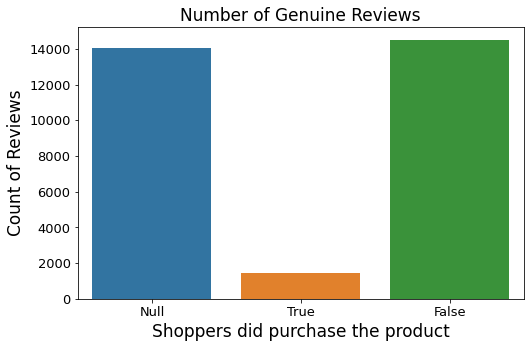

In [202]:
#checking distribution of reviews_didpurchased
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,5))
ax = sns.countplot(df['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)
plt.show()

In [203]:
df['reviews_didPurchase'].value_counts()

False    14498
Null     14067
True      1434
Name: reviews_didPurchase, dtype: int64

Shoppers who did purchase the product and provided the reveiw is just 4% in the dataset. With such low data this column is not required for the analysis


In [204]:
#on the reviews_doRecommend column, replace null values with "Null"
df['reviews_doRecommend'].fillna('Null', inplace=True)

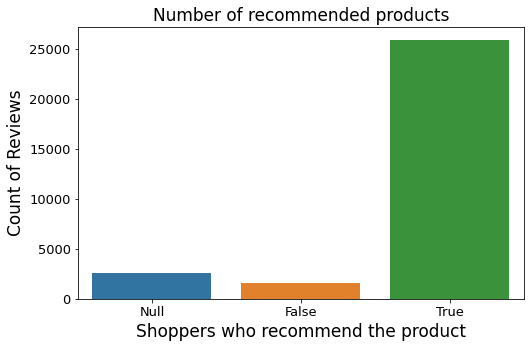

In [205]:
#checking distribution of reviews_didpurchased
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,5))
ax = sns.countplot(df['reviews_doRecommend'])
ax.set_xlabel(xlabel="Shoppers who recommend the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of recommended products', fontsize=17)
ax.tick_params(labelsize=13)
plt.show()

In [206]:
df['reviews_doRecommend'].value_counts()

True     25879
Null      2570
False     1550
Name: reviews_doRecommend, dtype: int64

Many products were recommended by the users but this column won't be significant for our analysis

In [207]:
#Checking most purchased product
df1 = df[df['reviews_didPurchase'] == True]
df1['name'].value_counts()

Hormel Chili, No Beans                                   91
Coty Airspun Face Powder, Translucent Extra Coverage     87
Chester's Cheese Flavored Puffcorn Snacks                77
Tostitos Bite Size Tortilla Chips                        59
Lysol Concentrate Deodorizing Cleaner, Original Scent    55
                                                         ..
Suave Professionals Hair Conditioner, Sleek               1
42 Dual Drop Leaf Table with 2 Madrid Chairs"             1
If A Man Answers (dvd)                                    1
Tai Pei Sweet & Sour Chicken                              1
Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black         1
Name: name, Length: 144, dtype: int64

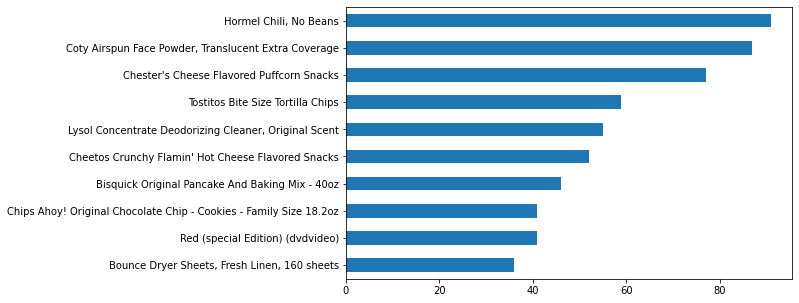

In [208]:
#Checking most purchased product
df1['name'].value_counts()[0:10].plot(kind = 'barh', figsize=[8,5], fontsize=10).invert_yaxis()

Hormel Chili, No Beans is purchased more than other products

In [209]:
#--- split the date into seperate columns of date month and year
#--- extract date from the reviews_date column
df['reviews_onlydate'] = df['reviews_date'].str[:10]
df['reviews_onlydate']

0        2012-11-30
1        2017-07-09
2        2017-07-09
3        2016-01-06
4        2016-12-21
            ...    
29995    2017-01-23
29996    2017-01-27
29997    2017-01-21
29998    2017-01-11
29999    2017-01-19
Name: reviews_onlydate, Length: 29999, dtype: object

In [210]:
#--- split the date into seperate columns of date month and year
#--- set the datatype to the above extracted date column
df['reviews_onlydate'] = pd.to_datetime(df['reviews_onlydate'], errors='coerce').dt.date
df['reviews_onlydate'].fillna(df['reviews_onlydate'].value_counts().idxmax(),inplace=True)
df['reviews_onlydate'] = pd.to_datetime(df.reviews_onlydate, format='%Y-%m-%d')
df['reviews_onlydate']

0       2012-11-30
1       2017-07-09
2       2017-07-09
3       2016-01-06
4       2016-12-21
           ...    
29995   2017-01-23
29996   2017-01-27
29997   2017-01-21
29998   2017-01-11
29999   2017-01-19
Name: reviews_onlydate, Length: 29999, dtype: datetime64[ns]

In [211]:
#--- split the date into seperate columns of date month and year
df['month'] = df['reviews_onlydate'].dt.month
df['year'] = df['reviews_onlydate'].dt.year

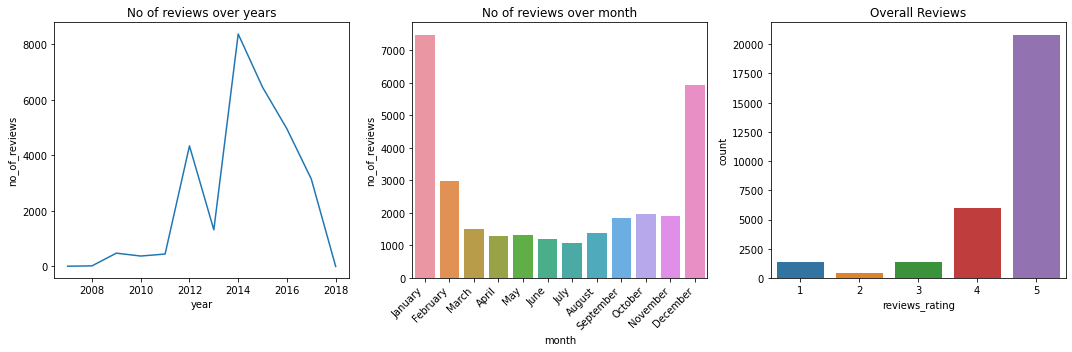

In [212]:
f, axes = plt.subplots(1,3, figsize=(15,5))
#--- Yearly Reviews
yearly = df.groupby(['year'])['reviews_username'].count().reset_index()
yearly = yearly.rename(columns={'reviews_username':'no_of_reviews'})
yearChart = sns.lineplot(x='year',y='no_of_reviews',data=yearly, ax = axes[0])
yearChart.set_title('No of reviews over years')

#--- Monthly Reviews
monthly = df.groupby(['month'])['reviews_username'].count().reset_index()
monthly['month'] = monthly['month'].apply(lambda x : calendar.month_name[x])
monthly = monthly.rename(columns={'reviews_username':'no_of_reviews'})
monthChart = sns.barplot(x='month',y='no_of_reviews',data=monthly, ax = axes[1])
monthChart.set_title('No of reviews over month')
monthChart.set_xticklabels(monthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

#-- Getting overall ratings for all products
sns.countplot(x = 'reviews_rating', data = df, ax = axes[2] ).set_title('Overall Reviews')

f.tight_layout()

***Rating Trend over the years***
- There is a significant increase in number of ratings given by users around 2013 - 2015 and later from 2016 there is sharp decrease.
- number of reviews given were high during December and January, may be due to month end sales where there are no significant reviews in other months.

***Distribution of overall ratings***
- Many users have given a rating of 5 to products followed by 4, 3 and 1 whereas very few users have given a low rating of 2.


In [213]:
#--- ratings distribution with product id
ratings=pd.DataFrame(df.groupby('id')['reviews_rating'].mean())
ratings['Number_Of_Ratings']=pd.DataFrame(df.groupby('id')['reviews_rating'].count())
ratings.head()

,reviews_rating,Number_Of_Ratings
id,,
AV13O1A8GV-KLJ3akUyj,5.000000,1
AV14LG0R-jtxr-f38QfS,5.000000,2
AV16khLE-jtxr-f38VFn,2.518519,27
AV1YGDqsGV-KLJ3adc-O,4.129310,348
AV1YIch7GV-KLJ3addeG,5.000000,1


Looks like there are few products with very few ratings received.

Let's now check the distribution of count of ratings and the mean ratings

Text(0.5, 1.0, 'Distribution of Ratings')

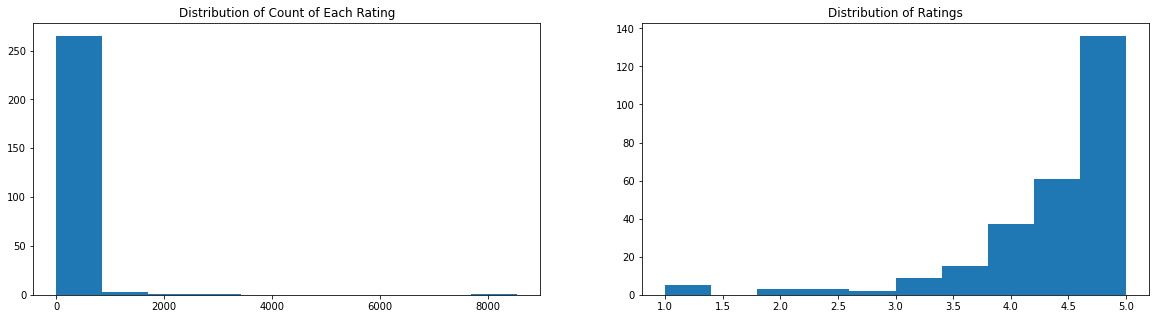

In [214]:
#distribution of count of ratings and mean ratings
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(ratings.Number_Of_Ratings)
plt.title('Distribution of Count of Each Rating')

plt.subplot(1,2,2)
plt.hist(ratings.reviews_rating)
plt.title('Distribution of Ratings')

In [215]:
ratings.describe()

,reviews_rating,Number_Of_Ratings
count,271.000000,271.000000
mean,4.374024,110.697417
std,0.749857,586.868662
min,1.000000,1.000000
25%,4.127155,3.000000
50%,4.600000,8.000000
75%,4.909091,29.000000
max,5.000000,8545.000000


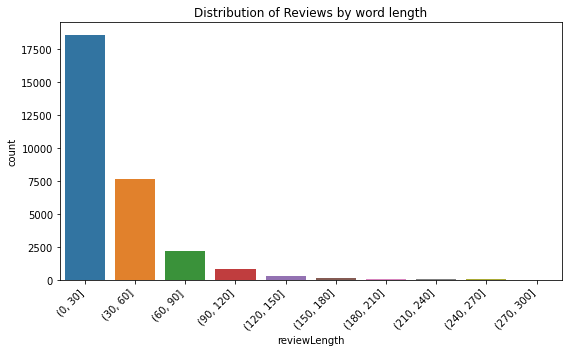

In [216]:
#f, axes = plt.subplots(1,1, figsize=(12,8))
#---- Distribution of word reviews by length
f = plt.figure(figsize=(8,5))
df_reviews = df[['id','reviews_username','reviews_text','reviews_title','reviews_rating']]
df_reviews['reviewLength'] = df_reviews['reviews_text'].apply(lambda x: len(x.split()))

reviews_word_length = df_reviews.groupby(pd.cut(df_reviews.reviewLength, np.arange(0,330,30))).count()
reviews_word_length = reviews_word_length.rename(columns={'reviewLength':'count'})
reviews_word_length = reviews_word_length.reset_index()

reviewLengthChart = sns.barplot(x='reviewLength',y='count',data=reviews_word_length)
reviewLengthChart.set_title('Distribution of Reviews by word length')
reviewLengthChart.set_xticklabels(reviewLengthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()

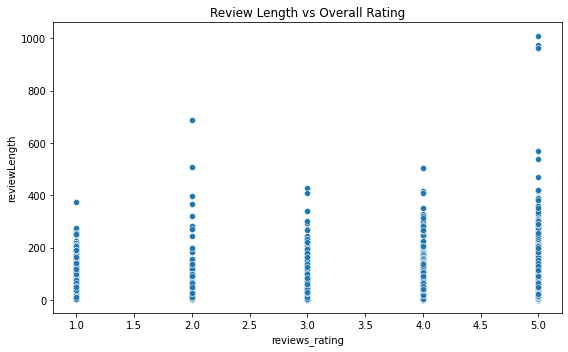

In [217]:
#f, axes = plt.subplots(1,2, figsize=(12,8))
f = plt.figure(figsize=(8,5))

#--- Distribution of length of reviews vs overall rating
reviewLength_vs_Rating = df_reviews[['id','reviewLength','reviews_rating']]
reviewLength_vs_Rating = sns.scatterplot(x='reviews_rating', y='reviewLength', data=reviewLength_vs_Rating)
reviewLength_vs_Rating.set_title('Review Length vs Overall Rating')

f.tight_layout()

from the above plot we can see that rating and review length are related to each other.

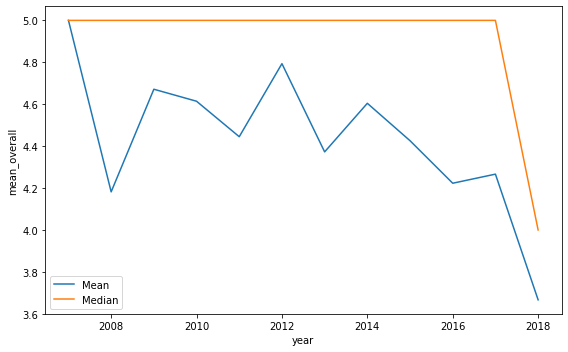

In [218]:
#--- mean median and mode of overall ratings
f = plt.figure(figsize=(8,5))
#---mean
stat_reviews_yearly = df.groupby(['year'])['reviews_rating'].mean().reset_index()
stat_reviews_yearly = stat_reviews_yearly.rename(columns={'reviews_rating':'mean_overall'})
#---median
median_yearly = df.groupby(['year'])['reviews_rating'].median().reset_index()
stat_reviews_yearly['median_overall'] = median_yearly['reviews_rating']
#--- plotting the values
sns.lineplot(x='year',y='mean_overall',data=stat_reviews_yearly, label = 'Mean')
sns.lineplot(x='year',y='median_overall',data=stat_reviews_yearly, label = 'Median')
f.tight_layout()

Looking at above plot, we can infer that over the years 2008 to 2018, the mean rating of the products has reduced

In [219]:
# #---mode
df.groupby(['year'])['reviews_rating'].value_counts()

year  reviews_rating
2007  5                   10
2008  5                   13
      4                    4
      2                    2
      3                    2
      1                    1
2009  5                  367
      4                   95
      3                   14
      2                    7
      1                    4
2010  5                  292
      4                   63
      1                   14
      3                    8
      2                    4
2011  5                  307
      4                   92
      3                   23
      1                   18
      2                   14
2012  5                 3719
      4                  511
      3                   59
      1                   47
      2                   28
2013  5                  865
      4                  295
      1                   80
      3                   60
      2                   34
2014  5                 5952
      4                 1858
      3               

In [220]:
#--- get the unique products in products list
len(df['reviews_username'].unique())

24915

In [221]:
reviewLength = df_reviews[['id','reviewLength']]
print(reviewLength.count())

id              29999
reviewLength    29999
dtype: int64


        reviews_username  no of reviews
3403   byamazon customer             41
15805               mike             41
4749               chris             32
13806               lisa             16
19558               rick             15

   no of reviews  count
0              1  21305
1              2   3007
2              3    338
3              4    108
4              5     60


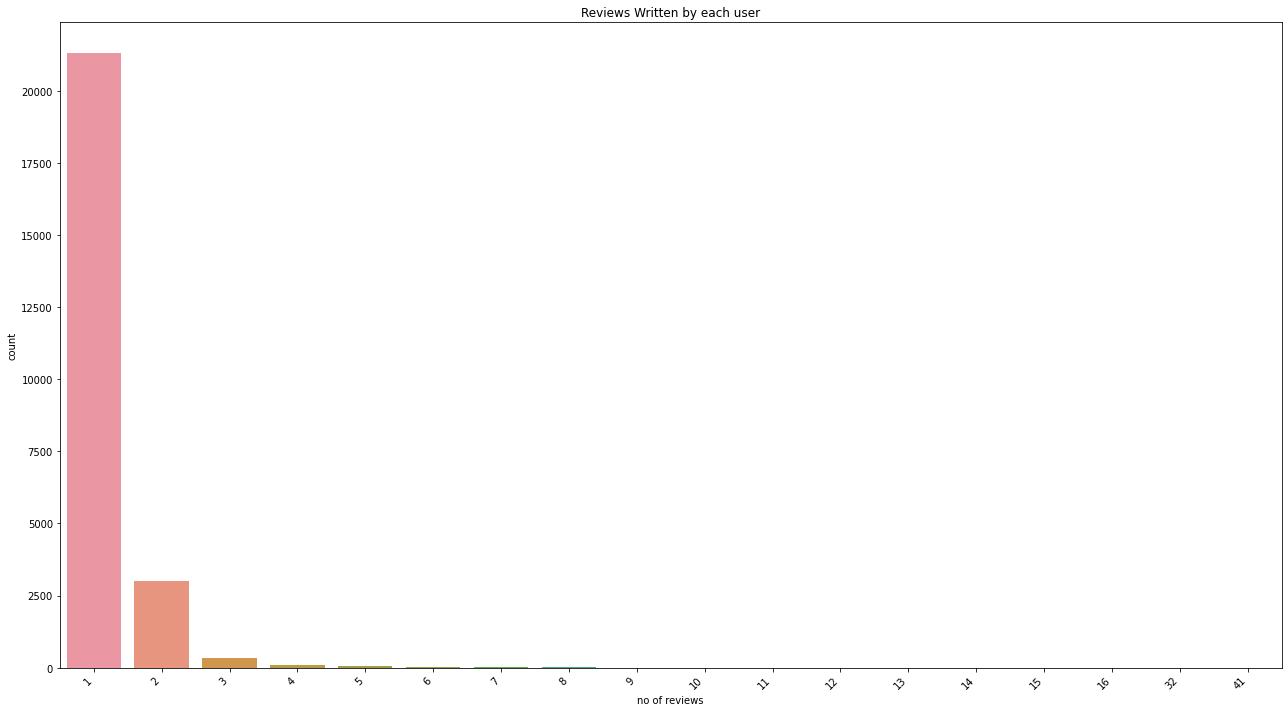

In [222]:
#--- Distribution of number of reviews written by each user
f = plt.figure(figsize=(18,10))
userReviews = df[['reviews_username','id']]
userReviews = userReviews.groupby(['reviews_username']).count().reset_index()
userReviews = userReviews.sort_values('id',ascending = False)
userReviews = userReviews.rename(columns={'id':'no of reviews'})
print(userReviews.head())

userReviews1 = userReviews.groupby('no of reviews')['reviews_username'].count().reset_index()
userReviews1 = userReviews1.rename(columns={'reviews_username':'count'})
print()
print(userReviews1.head())
userReviewChart = sns.barplot(x = 'no of reviews',y = 'count',data = userReviews1)
userReviewChart.set_title('Reviews Written by each user')
userReviewChart.set_xticklabels(userReviewChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
f.tight_layout()

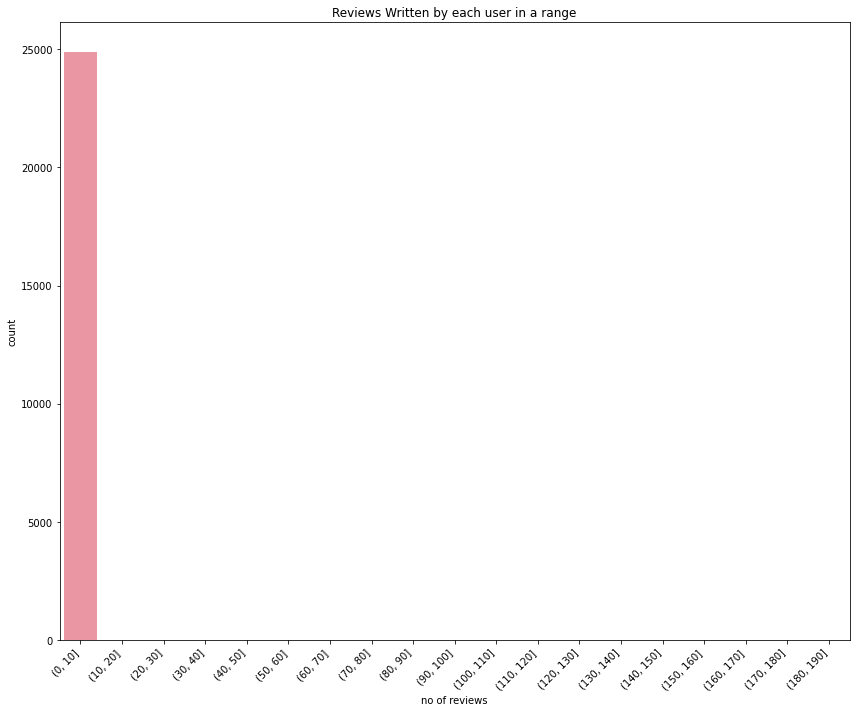

In [223]:
f = plt.figure(figsize=(12,10))
userReviews2 = userReviews1.groupby(pd.cut(userReviews1['no of reviews'],np.arange(0,200,10))).sum()
userReviews2 = userReviews2.rename(columns={'no of reviews':'range of reveiws'})
userReviews2 = userReviews2.reset_index()
userReviewChart = sns.barplot(x='no of reviews',y='count',data=userReviews2)
userReviewChart.set_title('Reviews Written by each user in a range')
userReviewChart.set_xticklabels(userReviewChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
f.tight_layout()

on an average each user gives 5 reviews and most reviewed user has given 41 reviews for all the different products, facts and figures are shown below in recommender system as it gives us a better understanding of the user.

### ***3. Data Cleaning,Text Pre-processing***

- Data preprocessing and cleaning is an important step before any text processing  task.
- Here we will remove the punctuations, stopwords and normalize the reviews as much as possible.

#### ***3.1 Handling Duplicate data***
There exists a lot of duplicates where same product are reviewed by same user many times at same timings. Also same product with different flavours also got reviewed by same user at different timings, so let's average out the ratings of each user for same product.

In [224]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment',
       'reviews_onlydate', 'month', 'year'],
      dtype='object')

In [225]:
#--check duplicates
df.duplicated(subset={"reviews_username","id"}).value_counts()

False    27605
True      2394
dtype: int64

In [226]:
df.duplicated(subset={"reviews_username","name"}).value_counts()

False    27605
True      2394
dtype: int64

In [227]:
#duplicates
duplicates = df[df.duplicated(subset={"reviews_username","id"})]
duplicates.reviews_username.value_counts()

byamazon customer    39
mike                 24
chris                19
tony                  7
thomas                6
                     ..
lcowley               1
dorty                 1
susanb                1
rlprice09             1
ecyoung105            1
Name: reviews_username, Length: 2115, dtype: int64

In [228]:
#customer with more duplicates
df[df['reviews_username'] == 'byamazon customer']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_onlydate,month,year
16778,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-02-03T00:00:00.000Z,Null,Null,1,A waste of my money I don't know what kind of ...,Dyed Rice,NaN,NaN,byamazon customer,Positive,2016-02-03,2,2016
16799,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2017-01-07T00:00:00.000Z,Null,Null,4,"Good but if you like it, get it in quantity",Yum,NaN,NaN,byamazon customer,Positive,2017-01-07,1,2017
16807,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2015-08-19T00:00:00.000Z,Null,Null,4,RICE LOOKS GOOD.,RICE IS FINE,NaN,NaN,byamazon customer,Positive,2015-08-19,8,2015
16812,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2015-04-08T00:00:00.000Z,Null,Null,4,I love the zip lock seal on these bags (unique...,I love the zip lock seal on these bags (unique...,NaN,NaN,byamazon customer,Positive,2015-04-08,4,2015
16824,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2011-07-20T00:00:00.000Z,Null,Null,4,Lundberg Jubilee is a blend of sweet brown ric...,Beautiful and High-Quality Rice But Too Much S...,NaN,NaN,byamazon customer,Positive,2011-07-20,7,2011
16841,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2017-06-05T00:00:00.000Z,Null,Null,5,This takes much longer to cook but the taste i...,Happy,NaN,NaN,byamazon customer,Positive,2017-06-05,6,2017
16850,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2017-04-20T00:00:00.000Z,Null,Null,5,Great rice in a small package...I'll be buying...,Recommended,NaN,NaN,byamazon customer,Positive,2017-04-20,4,2017
16904,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-07-03T00:00:00.000Z,Null,Null,5,Very tasty! Very earthy rice great for breakfa...,Lindberg is just the best!,NaN,NaN,byamazon customer,Positive,2016-07-03,7,2016
16920,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-06-23T00:00:00.000Z,Null,Null,5,It was great. Very convenient in the 1 lb bags.,Five Stars,NaN,NaN,byamazon customer,Positive,2016-06-23,6,2016
16929,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-02-20T00:00:00.000Z,Null,Null,5,Good rice.,Five Stars,NaN,NaN,byamazon customer,Positive,2016-02-20,2,2016


In the above data we can see that 'byamazon customer' gave the multiple product reviews at the same time which is not possible ethically, the product were same but different flavours hence counted as multiple products.
Let's take average ratings of username to avoid confusion with such data.

In [229]:
#--average ratings
df['avg_ratings'] = df.groupby(['id','reviews_username'])['reviews_rating'].transform('mean')
df['avg_ratings']=df['avg_ratings'].round(2)
df[['id','reviews_username','reviews_rating','avg_ratings']]

,id,reviews_username,reviews_rating,avg_ratings
0,AV13O1A8GV-KLJ3akUyj,joshua,5,5.0
1,AV14LG0R-jtxr-f38QfS,dorothy w,5,5.0
2,AV14LG0R-jtxr-f38QfS,dorothy w,5,5.0
3,AV16khLE-jtxr-f38VFn,rebecca,1,1.0
4,AV16khLE-jtxr-f38VFn,walker557,1,1.0
...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,laurasnchz,5,5.0
29996,AVpfW8y_LJeJML437ySW,scarlepadilla,5,5.0
29997,AVpfW8y_LJeJML437ySW,liviasuexo,5,5.0
29998,AVpfW8y_LJeJML437ySW,ktreed95,5,5.0


In [230]:
#check average ratings of customer with more duplicates
df[df.reviews_username == 'byamazon customer'][['id','reviews_username','reviews_rating','avg_ratings']]

,id,reviews_username,reviews_rating,avg_ratings
16778,AVpf9pzn1cnluZ0-uNTM,byamazon customer,1,4.58
16799,AVpf9pzn1cnluZ0-uNTM,byamazon customer,4,4.58
16807,AVpf9pzn1cnluZ0-uNTM,byamazon customer,4,4.58
16812,AVpf9pzn1cnluZ0-uNTM,byamazon customer,4,4.58
16824,AVpf9pzn1cnluZ0-uNTM,byamazon customer,4,4.58
16841,AVpf9pzn1cnluZ0-uNTM,byamazon customer,5,4.58
16850,AVpf9pzn1cnluZ0-uNTM,byamazon customer,5,4.58
16904,AVpf9pzn1cnluZ0-uNTM,byamazon customer,5,4.58
16920,AVpf9pzn1cnluZ0-uNTM,byamazon customer,5,4.58
16929,AVpf9pzn1cnluZ0-uNTM,byamazon customer,5,4.58


In [231]:
#Deleting all the duplicates having the same product id and username.
dfFinal =  df.drop_duplicates(subset={"reviews_username","id"},keep="first")

In [232]:
size_diff = dfFinal['id'].size/df['id'].size
print("%.1f %% reduction in data after deleting duplicates"%((1-size_diff)*100))
print("Size of data",dfFinal['id'].size," rows ")

#---- Data is cleaned and no Duplicates are there

8.0 % reduction in data after deleting duplicates
Size of data 27605  rows 


In [233]:
#check
dfFinal[dfFinal['reviews_username'] == 'byamazon customer']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_onlydate,month,year,avg_ratings
16778,AVpf9pzn1cnluZ0-uNTM,Lundberg,"Food,Packaged Foods,Packaged Grains,Rice,Brown...",Lundberg Family Farms,"Lundberg Wehani Rice, 25lb",2016-02-03T00:00:00.000Z,Null,Null,1,A waste of my money I don't know what kind of ...,Dyed Rice,NaN,NaN,byamazon customer,Positive,2016-02-03,2,2016,4.58
26450,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2017-07-05T00:00:00.000Z,Null,Null,1,"The first time I used in my infant, he rubbed ...",Not Tear Free Not Useful,NaN,NaN,byamazon customer,Positive,2017-07-05,7,2017,3.41


In [234]:
dfFinal["avg_ratings"].mean()

4.522514136581123

#### ***3.2 Text Preprocessing***
- Let's combine Reviews Title and Reviews text as both of them gives significant sentiment analysis.
- As the review is mostly text data, we might need to clean the data to gain some useful insights from the data 

In [235]:
#concatenate user_text and user_title
# Filling missing values in Reviews title with blank space
dfFinal['reviews_title'] = dfFinal['reviews_title'].fillna('')
dfFinal['user_reviews'] = dfFinal[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')
dfFinal[['reviews_title','reviews_text','user_reviews']]

,reviews_title,reviews_text,user_reviews
0,Just Awesome,i love this album. it's very good. more to the...,Just Awesome. i love this album. it's very goo...
1,Good,Good flavor. This review was collected as part...,Good. Good flavor. This review was collected a...
3,Disappointed,I read through the reviews on here before look...,Disappointed. I read through the reviews on he...
4,Irritation,My husband bought this gel for us. The gel cau...,Irritation. My husband bought this gel for us....
5,Not worth it,My boyfriend and I bought this to spice things...,Not worth it. My boyfriend and I bought this t...
...,...,...,...
29995,Softness!!,I got this conditioner with Influenster to try...,Softness!!. I got this conditioner with Influe...
29996,I love it,"I love it , I received this for review purpose...","I love it. I love it , I received this for rev..."
29997,Hair is so smooth after use,First of all I love the smell of this product....,Hair is so smooth after use. First of all I lo...
29998,Perfect for my oily hair!,I received this through Influenster and will n...,Perfect for my oily hair!. I received this thr...


In [236]:
#--- HTML Tag Removal
import re #Regex (Regular Expr Operations)
#string = r"sdfsdfd" :- r is for raw string as Regex often uses \ backslashes(\w), so they are often raw strings(r’\d’)
########Function to remove html tags from data
def striphtml(data):
    p = re.compile('<.*?>')#Find this kind of pattern
    #print(p.findall(data))#List of strings which follow the regex pattern
    return p.sub('',data) #Substitute nothing at the place of strings which matched the patterns

striphtml('<a href="foo.com" class="bar">My Name is  <b>Naga Sravya Sakam!</b></a><>')

'My Name is  Naga Sravya Sakam!'

In [237]:
#--- Punctuation removal
########Function to remove All the punctuations from the text
def strippunc(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)
strippunc("Sravya*?~,,,( sakam)#")

'Sravya sakam'

In [238]:
#--- StopWords

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = stopwords.words('english') #All the stopwords in English language
#excluding some useful words from stop words list as we doing sentiment analysis
excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop = [words for words in stop if words not in excluding]
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',

In [239]:
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english') #initialising the snowball stemmer
print("Stem/Root words of the some of the words using SnowBall Stemmer:")
print(snow.stem('tasty'))
print(snow.stem('tasteful'))
print(snow.stem('tastiest'))
print(snow.stem('delicious'))
print(snow.stem('amazing'))
print(snow.stem('amaze'))
print(snow.stem('initialize'))
print(snow.stem('fabulous'))
print(snow.stem('Honda City'))
print(snow.stem('unpleasant'))

Stem/Root words of the some of the words using SnowBall Stemmer:
tasti
tast
tastiest
delici
amaz
amaz
initi
fabul
honda c
unpleas


In [240]:
#pre-processing output for one Review
def preprocessText(text, stem=False):
  filtered_sentence = []
  final_string = []
  #print(text)
  text = striphtml(text) #--- remove HTML Tags
  text = strippunc(text) #--- remove Punctuation
  for w in text.split(): #--- isalpha() methods returns “True” if all characters in the string are alphabets, Otherwise, It returns “False”.
    if(w.isalpha() and (len(w) > 2)):  #--- Check is value is not numeric and has length > 2
      if(w.lower() not in stop):       #--- Check if it is a stopword
        if stem : 
          s = (snow.stem(w.lower())).encode('utf8') #--- Stemming the word using snowball stemmer
        else:
          s = (w.lower()).encode('utf8') #--- Stemming the word using snowball stemmer
        filtered_sentence.append(s)
      else:
        continue
    else:
      continue
  cleanedText = b" ".join(filtered_sentence) # string of cleaned words
  final_string.append(cleanedText)
  return final_string

print('---- Uncleaned Text ----')
print(dfFinal.user_reviews[0])
print('---- Cleaned Text ----')
print(preprocessText(dfFinal.user_reviews[0],True))
print()
print('---- Cleaned Text (without Stemming)----')
print(preprocessText(dfFinal.user_reviews[0]))
print()

---- Uncleaned Text ----
Just Awesome. i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
---- Cleaned Text ----
[b'awesom love album good hip hop side current pop sound hype listen everyday gym give rate way metaphor crazi']

---- Cleaned Text (without Stemming)----
[b'awesome love album good hip hop side current pop sound hype listen everyday gym give rating way metaphors crazy']



In [241]:
df_main = dfFinal.copy(deep = True)
df_main['cleanedReview'] = df_main['user_reviews'].map(preprocessText)
df_main.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_onlydate,month,year,avg_ratings,user_reviews,cleanedReview
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,Null,Null,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,2012-11-30,11,2012,5.0,Just Awesome. i love this album. it's very goo...,[b'awesome love album good hip hop side curren...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,Null,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,2017-07-09,7,2017,5.0,Good. Good flavor. This review was collected a...,[b'good good flavor review collected part prom...
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,2016-01-06,1,2016,1.0,Disappointed. I read through the reviews on he...,[b'disappointed read reviews looking buying on...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,2016-12-21,12,2016,1.0,Irritation. My husband bought this gel for us....,[b'irritation husband bought gel gel caused ir...
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative,2016-04-20,4,2016,1.0,Not worth it. My boyfriend and I bought this t...,[b'not worth boyfriend bought spice things bed...


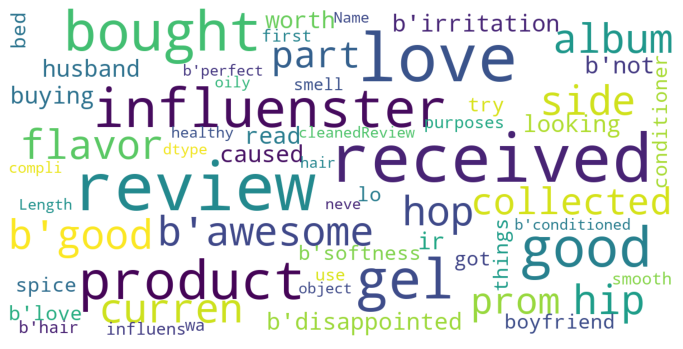

In [242]:
#--- WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1).generate(str(data)) # chosen at random by flipping a coin; it was heads
  fig = plt.figure(1, figsize=(12, 10))
  plt.axis('off')
  if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(df_main['cleanedReview'])
print()
print()

### ***4. Sentiment Analysis***

Sentiment Analysis is the automated process of understanding the sentiment or opinion of a given text. This machine learning tool can provide insights by automatically analyzing product reviews and separating them into tags: Positive, Neutral, Negative.

#### ***4.1. Classifying reviews based on sentiment using VaderSentiment***
In this part, I have used a prebuilt library [VaderSentiment](https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f) which is used in predicting the sentiment of a review based on the lexicon arrangement of the words in a review. Also different statergies to actually predict the sentiment for each review by classifying it into Positive, Neutral and Negative reviews. 

- Using naive bayes classifier to generate probabilities for each document 
- based on generated sentiment score on each document, we can classify the review into 3 categories(positive,negative and neutral)

In [243]:
#---Function to calculate sentiments using Naive Bayes Analyzer
def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore

# VADER sentiment analysis tool for getting Compound score.
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'positive'
    elif (score > -0.5) and (score < 0.5):
        return 'neutral'
    elif score <= -0.5:
        return 'negative'

In [244]:
#---- sample run on classifying the sentance
#sentence = 'there is no negative about this product It actually works with zero faults.' #---- Worst Case -- POS but Classified as NEG
#sentence = 'this product is absolutely great.' #---- Best Case -- POS
#sentence = 'this product is absolutely great but with some faults.' #---- Best Case -- NEU
sentence = 'this product actually works with zero faults.' #---- Worst Case -- POS but classified as NEG
sent = sentimental_Score(sentence)
print('The Sentence : \n',sentence)
print('The Sentence is of " ',sent,' " Sentiment.')

The Sentence : 
 this product actually works with zero faults.
The Sentence is of "  neutral  " Sentiment.


From the above we can see that some times the library generates a false sentiment. So let's build models using existing user_sentiment column


Sentiment value is calculated for each review and stored in the new column 'Sentiment_Score' of DataFrame 'df_main'.

As we have generated sentiment scores for all the reviews we can now see what are the most repeated words for positive and negative reviews using a word cloud.

In [245]:
df_main['Sentiment_Score']=df_main['user_reviews'].apply(lambda x: sentimental_Score(x))

In [246]:
df_main[['reviews_text','Sentiment_Score']]

,reviews_text,Sentiment_Score
0,i love this album. it's very good. more to the...,positive
1,Good flavor. This review was collected as part...,positive
3,I read through the reviews on here before look...,negative
4,My husband bought this gel for us. The gel cau...,negative
5,My boyfriend and I bought this to spice things...,neutral
...,...,...
29995,I got this conditioner with Influenster to try...,positive
29996,"I love it , I received this for review purpose...",positive
29997,First of all I love the smell of this product....,positive
29998,I received this through Influenster and will n...,positive


In [247]:
df_main.to_pickle('df_sentiment.pkl')

In [248]:
positive_data = df_main.loc[df_main['Sentiment_Score'] == 'positive']
negative_data = df_main.loc[df_main['Sentiment_Score'] == 'negative']
neutral_data = df_main.loc[df_main['Sentiment_Score'] == 'neutral']

positive_data.to_pickle('positive_reviews.pkl')
negative_data.to_pickle('negative_reviews.pkl')
neutral_data.to_pickle('neutral_reviews.pkl')

In [249]:
sentimentAnalysisPath = "/content/gdrive/MyDrive/Dataset/Pickle/SentimentAnalysis.pkl"
PositiveReviewsPath = "/content/gdrive/MyDrive/Dataset/Pickle/SentimentAnalysis-positive.pkl"
NegativeReviewsPath = "/content/gdrive/MyDrive/Dataset/Pickle/SentimentAnalysis-negative.pkl"
NeutralReviewsPath = "/content/gdrive/MyDrive/Dataset/Pickle/SentimentAnalysis-neutral.pkl"
#---save the files into data
df_main.to_pickle(sentimentAnalysisPath)
positive_data.to_pickle(PositiveReviewsPath)
negative_data.to_pickle(NegativeReviewsPath)
neutral_data.to_pickle(NeutralReviewsPath)

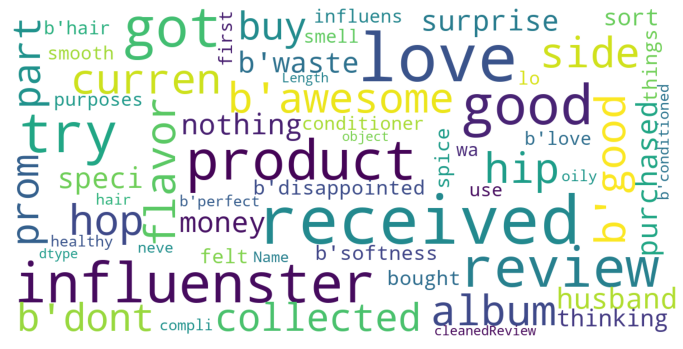

In [250]:
#---- Positive Reviews
show_wordcloud(positive_data['cleanedReview'])
print()

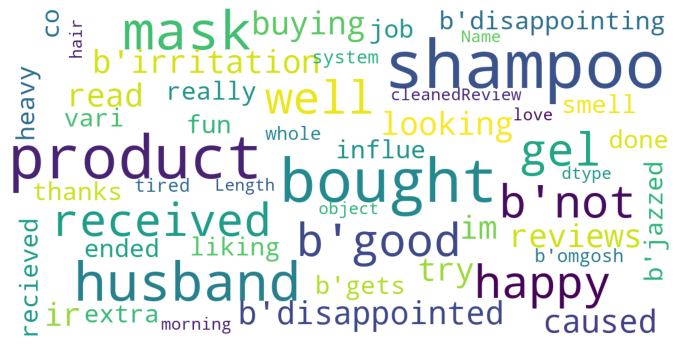

In [251]:
#---- Negative Reviews
show_wordcloud(negative_data['cleanedReview'])
print()

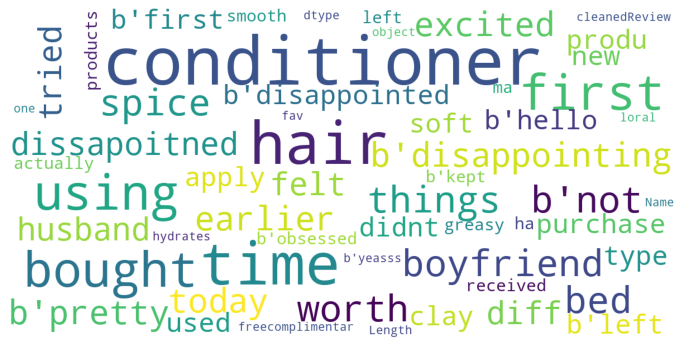

In [252]:
#---- Neutral Reviews
show_wordcloud(neutral_data['cleanedReview'])
print()

In [253]:
#Let's drop the sentiment_score column as we won't be using it furthur
df_main = df_main.drop(['Sentiment_Score'],axis=1)

#### ***4.2 Building Models using existing User_sentiment column***

I have chosen XG Boost, Random Forest and logistic regression as models to classify the sentiment of the reviews.

In [254]:
df_main.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_onlydate,month,year,avg_ratings,user_reviews,cleanedReview
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,Null,Null,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,2012-11-30,11,2012,5.0,Just Awesome. i love this album. it's very goo...,[b'awesome love album good hip hop side curren...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,Null,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,2017-07-09,7,2017,5.0,Good. Good flavor. This review was collected a...,[b'good good flavor review collected part prom...
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,2016-01-06,1,2016,1.0,Disappointed. I read through the reviews on he...,[b'disappointed read reviews looking buying on...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,2016-12-21,12,2016,1.0,Irritation. My husband bought this gel for us....,[b'irritation husband bought gel gel caused ir...
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative,2016-04-20,4,2016,1.0,Not worth it. My boyfriend and I bought this t...,[b'not worth boyfriend bought spice things bed...


In [255]:
#remove brackets of user_reviews
df_main['user_reviews'] = pd.DataFrame(df_main.cleanedReview.tolist(), index= df_main.index)

In [256]:
df_main['user_reviews']

0        b'awesome love album good hip hop side current...
1        b'good good flavor review collected part promo...
3        b'disappointed read reviews looking buying one...
4        b'irritation husband bought gel gel caused irr...
5        b'not worth boyfriend bought spice things bedr...
                               ...                        
29995    b'softness got conditioner influenster try lov...
29996    b'love love received review purposes influenst...
29997    b'hair smooth use first love smell product was...
29998    b'perfect oily hair received influenster never...
29999    b'conditioned healthy received product complim...
Name: user_reviews, Length: 27605, dtype: object

#### ***4.2.1 Feature Extraction***

Using TfidfCountVectorizer() for feature extraction

In [257]:
countVector = TfidfVectorizer(max_features = 10000, ngram_range = (1, 3), token_pattern=r'\w{1,}')
countVector.fit(df_main["user_reviews"])
tfidf = countVector.transform(df_main["user_reviews"])

y = df_main["user_sentiment"]
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.2, random_state=10)

**Handling the class imbalance**

It seems the dataset is higly imbalanced, and this will cause the model to predict the majority class data, and there is high chance that the minority data gets ignored. So we need to handle this before creating a model to predict the class

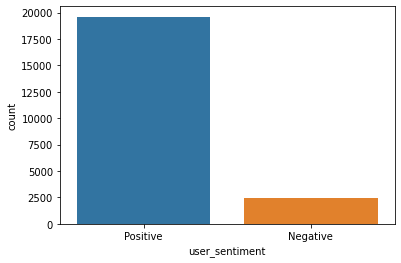

In [258]:
sns.countplot(y_train)
plt.show()

In [259]:
# Handle the imbalance using SMOTE technique
from imblearn.over_sampling import SMOTE

In [260]:
balance = SMOTE(random_state=50)
X_train_bal, y_train_bal = balance.fit_resample(X_train, y_train)

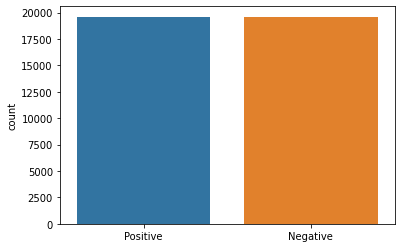

In [261]:
sns.countplot(y_train_bal)
plt.show()

#### ***4.2.2 Model Building***

In [262]:
#defining dict for storing all models
prediction = dict()

**Model 1: Random Forest Classifier**

In [263]:
from sklearn.ensemble import RandomForestClassifier
seed = 71
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
classifier.fit(X_train_bal, y_train_bal)
#preds1 = classifier.predict(X_test)
prediction['RandomForest'] = classifier.predict(X_test)

In [264]:
print("Random Forest Model accuracy", accuracy_score(prediction['RandomForest'], y_test))
print(classification_report(prediction['RandomForest'],y_test))
print(confusion_matrix(prediction['RandomForest'],y_test))

Random Forest Model accuracy 0.9058141641007064
              precision    recall  f1-score   support

    Negative       0.46      0.57      0.51       479
    Positive       0.96      0.94      0.95      5042

    accuracy                           0.91      5521
   macro avg       0.71      0.75      0.73      5521
weighted avg       0.92      0.91      0.91      5521

[[ 272  207]
 [ 313 4729]]


On applying the Random Forest on balanced data set, gives a accuracy of 91 percent.

**Model2 : XGBoost**

In [265]:
import xgboost as xgb

xgb = xgb.XGBClassifier(n_jobs=1)
xgb.fit(X_train_bal, y_train_bal)
prediction['XGBoost'] = xgb.predict(X_test)

In [266]:
# manual method to check accuracy, see some prediction of rating
prediction['XGBoost'][0:100: 5]

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive'],
      dtype=object)

In [267]:
# manual method to check accuracy, see correct test label
np.array(y_test)[0:100: 5]

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive'],
      dtype=object)

In [268]:
print("XGBoost Model accuracy", accuracy_score(prediction['XGBoost'], np.array(y_test)))

XGBoost Model accuracy 0.8235826842963231


In [269]:
print("XGBoost Model accuracy", accuracy_score(prediction['XGBoost'], y_test))
print(classification_report(prediction['XGBoost'], y_test))
print(confusion_matrix(prediction['XGBoost'], y_test))

XGBoost Model accuracy 0.8235826842963231
              precision    recall  f1-score   support

    Negative       0.65      0.33      0.44      1147
    Positive       0.84      0.95      0.90      4374

    accuracy                           0.82      5521
   macro avg       0.75      0.64      0.67      5521
weighted avg       0.80      0.82      0.80      5521

[[ 379  768]
 [ 206 4168]]


On applying the XG Boost on balanced data set, gives a accuracy of 82 percent.

**Model3: Logistic Regression**

In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [271]:
logit = LogisticRegression(C=1, multi_class = 'ovr')
logit.fit(X_train_bal, y_train_bal)
prediction['Logistic'] = logit.predict(X_test)

In [272]:
print("Logistic Regression accuracy", accuracy_score(prediction['Logistic'], y_test))
print(classification_report(prediction['Logistic'], y_test))
print(confusion_matrix(prediction['Logistic'], y_test))

Logistic Regression accuracy 0.884260097808368
              precision    recall  f1-score   support

    Negative       0.77      0.47      0.59       960
    Positive       0.90      0.97      0.93      4561

    accuracy                           0.88      5521
   macro avg       0.84      0.72      0.76      5521
weighted avg       0.88      0.88      0.87      5521

[[ 453  507]
 [ 132 4429]]


On applying the Logistic Regression on balanced data set, gives a accuracy of 88 percent.

**Model 4: Bernoulli Naive Bayes**

In [273]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_bal,y_train_bal)

# predict probability
prediction['Bernoulli'] = bnb.predict(X_test)


In [274]:
print("Logistic Regression accuracy", accuracy_score(prediction['Bernoulli'], y_test))
print(classification_report(prediction['Bernoulli'], y_test))
print(confusion_matrix(prediction['Bernoulli'], y_test))

Logistic Regression accuracy 0.8561854736460786
              precision    recall  f1-score   support

    Negative       0.44      0.36      0.39       721
    Positive       0.91      0.93      0.92      4800

    accuracy                           0.86      5521
   macro avg       0.67      0.64      0.66      5521
weighted avg       0.84      0.86      0.85      5521

[[ 256  465]
 [ 329 4471]]


On applying the Bernoulli Naive Bayes on balanced data set, gives a accuracy of 86 percent.

Results:
- XG Boost and Bernoulli Naive Bayes are having less accuracy compared to Logistic and Random Forest, So let's ignore using it for furthur analysis
- Logistic Regression gives decent accuracy and also it is simple model compared to Random Forest.(Simple models are preferred for model building)
- Random Forest got good accuracy compared with two models
- Let's do hyper parameter tuning for Logistic and Random Forest to decide which model to select

**Model 5: HyperParameter Tuning for Logistic Regression Model**

In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits = 4, shuffle = True, random_state = 100)

#hyperparameters to tune

param_grid = {'C' : [1,10,20],'solver' : ['newton-cg', 'lbfgs'],'penalty' : ['l1','l2']}
#model object
lm = LogisticRegression(random_state=100)
#GridSearchCV()
lm_cv = GridSearchCV(estimator = lm,
                      param_grid = param_grid,
                      scoring = 'roc_auc',
                      cv=folds,
                      verbose = 1,
                      n_jobs = -1,
                      return_train_score=False)

#fit the model
lm_cv.fit(X_train_bal,y_train_bal)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   17.7s finished


GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 20], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [276]:
predictions_LR = lm_cv.predict(X_test)
predictions_LR

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [277]:
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions_LR)))
print("\nClassification report : \n", metrics.classification_report(y_test, predictions_LR))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions_LR))


Accuracy on validation set: 0.8995

Classification report : 
               precision    recall  f1-score   support

    Negative       0.52      0.65      0.58       585
    Positive       0.96      0.93      0.94      4936

    accuracy                           0.90      5521
   macro avg       0.74      0.79      0.76      5521
weighted avg       0.91      0.90      0.90      5521


Confusion Matrix : 
 [[ 379  206]
 [ 349 4587]]


Accuracy of the model has been increased from 0.88 to 0.90 after doing Hyper Parameter tuning on Logistic Regression model.

**Model 5: HyperParameter Tuning for Random Forest**

In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits = 4, shuffle = True, random_state = 100)

#hyperparameters to tune

param_grid = {'n_estimators': [5,50,200],
                'max_depth': [2,10,50,None]}
#model object
rfc = RandomForestClassifier()
#GridSearchCV()
rfc_cv = GridSearchCV(estimator = classifier,
                      param_grid = param_grid,
                      scoring = 'roc_auc',
                      cv=folds,
                      verbose = 1,
                      n_jobs = -1,
                      return_train_score=False)

#fit the model
rfc_cv.fit(X_train_bal,y_train_bal)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  7.1min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score

In [279]:
predictions_RF = rfc_cv.predict(X_test)
predictions_RF

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [280]:
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions_RF)))
print("\nClassification report : \n", metrics.classification_report(y_test, predictions_RF))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions_RF))


Accuracy on validation set: 0.9064

Classification report : 
               precision    recall  f1-score   support

    Negative       0.57      0.46      0.51       585
    Positive       0.94      0.96      0.95      4936

    accuracy                           0.91      5521
   macro avg       0.75      0.71      0.73      5521
weighted avg       0.90      0.91      0.90      5521


Confusion Matrix : 
 [[ 270  315]
 [ 202 4734]]


There is no significant change in Random Forest accuracy after hyperparameter tuning.

##### Selected Model : Logistic Regression after hyper parameter tuning
- Both Random Forest and Logistic Regression(after hyper parameter tuning) got good accuracy. 
- Choosing hyper paremeter tuned Logistic model as it's better to choose simple model

### LR model Predictions on entire dataset

In [281]:
results = lm_cv.predict(tfidf )

In [282]:
y_test_pred=pd.DataFrame(results, columns=['Predicted'])
y_test_actual=pd.DataFrame(df_main.user_sentiment).reset_index(drop=True)
y_test_pred['Actual']=y_test_actual.user_sentiment
y_test_pred.head()

,Predicted,Actual
0,Positive,Positive
1,Positive,Positive
2,Negative,Negative
3,Negative,Negative
4,Negative,Negative


In [283]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
squarer = lambda t: 1 if t=='Positive' else 0
vfunc = np.vectorize(squarer)
y_pred_copy=vfunc(results)
y_test_copy=df_main.user_sentiment.apply(lambda x:0 if x=='Negative' else 1) 
    
    
accuracy = round(accuracy_score(y_test_copy,y_pred_copy), 3)
precision = round(precision_score(y_test_copy,y_pred_copy), 3)
recall = round(recall_score(y_test_copy,y_pred_copy), 3)
f1     =round(f1_score(y_test_copy, y_pred_copy),3)
print(' Accuracy: {} / Precision: {} / Recall: {} / F1 Score : {}'.format(
                                    accuracy,
                                    precision,
                                    recall,
                                      f1))

 Accuracy: 0.969 / Precision: 0.991 / Recall: 0.975 / F1 Score : 0.983


In [284]:
confusion_matrix(y_test_copy,y_pred_copy)
pd.crosstab(y_test_copy, y_pred_copy, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2837,221,3058
1,623,23924,24547
All,3460,24145,27605


In [285]:
df_main['Prediction'] = y_test_pred['Predicted']

In [286]:
df_main[['reviews_text','reviews_title','user_sentiment','Prediction']].head()

,reviews_text,reviews_title,user_sentiment,Prediction
0,i love this album. it's very good. more to the...,Just Awesome,Positive,Positive
1,Good flavor. This review was collected as part...,Good,Positive,Positive
3,I read through the reviews on here before look...,Disappointed,Negative,Negative
4,My husband bought this gel for us. The gel cau...,Irritation,Negative,Negative
5,My boyfriend and I bought this to spice things...,Not worth it,Negative,Negative


In [287]:
# Save the Model
import joblib

# Save the model as a pickle in a file 
joblib.dump(lm_cv, r'/content/gdrive/MyDrive/Dataset/Pickle/sentiment_model.pkl')

['/content/gdrive/MyDrive/Dataset/Pickle/sentiment_model.pkl']

Getting the words that classify the best and worst features.

In [288]:
%%time
wordfeaturesPath = '/content/gdrive/MyDrive/Dataset/wordFeatures.csv'
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logit.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs = feature_coefs.sort_values(by='coefficient')
feature_coefs.to_csv(wordfeaturesPath)
print(feature_coefs.head())

           feature  coefficient
2131  disappointed    -7.516511
7901          sick    -7.367503
476            bad    -6.881346
4309      horrible    -6.412665
2128         dirty    -6.259100
CPU times: user 80 ms, sys: 3.97 ms, total: 83.9 ms
Wall time: 93.7 ms


In [289]:
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(countVector.get_feature_names())
sorted_coef_index = logit.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['disappointed' 'sick' 'bad' 'horrible' 'dirty' 'nasty' 'terrible' 'hate'
 'awful' 'wrong']

Top 10 features with largest coefficients : 
['great' 'clean' 'love' 'best' 'easy' 'good' 'better' 'loved' 'perfect'
 'nice']


#### **5. Recommendation System Notebook**
- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

Different Approaches to develop Recommendation System -

1. Demographich based Recommendation System

2. Content Based Recommendation System

3. Collaborative filtering Recommendation System

In [290]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [291]:
ratings = df_main.copy(deep = True)

In [292]:
#Removing null values from Username column
ratings = ratings.dropna(subset = ['reviews_username'])

In [293]:
ratings.shape

(27588, 22)

## 5.1 Dividing the dataset into train and test

In [294]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.30, random_state=31)

In [295]:
print(train.shape)
print(test.shape)

(19311, 22)
(8277, 22)


In [296]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are usernames.
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head(20)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### 5.2 Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products which have not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [297]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [298]:
# The products not rated by user are marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [299]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [300]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products.



# 5.3 User Similarity Matrix

## Using Cosine Similarity

In [301]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [302]:
user_correlation.shape

(17891, 17891)

## Using adjusted Cosine 

### Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [303]:
# Create a user-product matrix.
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [304]:
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Normalising the rating of the product for each user around 0 mean

In [305]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [306]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Finding cosine similarity

In [307]:
from sklearn.metrics.pairwise import pairwise_distances

In [308]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 5.3.1 User Based Prediction

Doing the prediction for the users who are positively related with other users, and not the users who are negatively related.  Since we are interested only in the users who are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [309]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [310]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [311]:
user_predicted_ratings.shape

(17891, 255)

In [312]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
finalratingPath = '/content/gdrive/MyDrive/Dataset/user_final_rating.csv'
user_final_rating.to_csv(finalratingPath)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### Recommendation of Top 20 Products to a Specified User

In [313]:
# Take the user name as input.
user_input = input("Enter your user name")
print(user_input)

Enter your user name00sab00
00sab00


In [314]:
user_final_rating.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [315]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Yes To Grapefruit Rejuvenating Body Wash                                                        0.0
Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White                                          0.0
Heiress (dvd)                                                                                   0.0
Heinz Tomato Ketchup, 38oz                                                                      0.0
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1                                             0.0
Head & Shoulders Classic Clean Conditioner                                                      0.0
Hawaiian Punch Berry Limeade Blast Juice                                                        0.0
Happy Tot Apple and Butternut Squash                                                            0.0
Greyson Vintage Industrial Occasional Cocktail Coffee Table - Antique Bronze - Baxton Studio    0.0
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                

# 5.3.2 User Based Evaluation



Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [316]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1106, 22)

In [317]:
common.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_onlydate,month,year,avg_ratings,user_reviews,cleanedReview,Prediction
4245,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover,Hoover174 Platinum Collection153 Lightweight B...,2010-04-26T01:57:33.000Z,Null,Null,5,"I have always had bagless uprights, and never ...",I Love This Vacuum!,NaN,NaN,teresa,Positive,2010-04-26,4,2010,5.0,b'love vacuum always bagless uprights never re...,[b'love vacuum always bagless uprights never r...,Positive
19882,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-27T00:00:00.000Z,False,True,5,These wipes are far better than any other wipe...,Awesome wipes,NaN,NaN,shaba,Positive,2012-01-27,1,2012,5.0,b'awesome wipes wipes far better wipes ive tri...,[b'awesome wipes wipes far better wipes ive tr...,Negative
26308,AVpfPnrU1cnluZ0-g9rL,Lionsgate,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,...",Lions Gate,Stargate (ws) (ultimate Edition) (director's C...,2014-12-12T00:00:00.000Z,Null,True,4,Movie that spawned a entire franchise. Classic...,classic sci fi,NaN,NaN,jayjay,Positive,2014-12-12,12,2014,4.0,b'classic sci movie spawned entire franchise c...,[b'classic sci movie spawned entire franchise ...,Positive
6284,AVpf385g1cnluZ0-s0_t,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,...",Hormel,"Hormel Chili, No Beans",2016-12-22T00:00:00.000Z,True,True,3,"The chili is great on a hotdog, but it doesn't...",Chilli dog,NaN,NaN,meme,Positive,2016-12-22,12,2016,3.0,b'chilli dog chili great hotdog doesnt taste r...,[b'chilli dog chili great hotdog doesnt taste ...,Positive
15580,AVpf5ujMilAPnD_xkQVi,D-Con,"Household Essentials,Pest Control,Patio & Gard...",Reckitt Benckiser,D-Con Mice Bait Station - 3ct,2016-08-24T16:53:27.000Z,Null,True,5,Very effective to eliminate rodents!!!,Excellent,Long Beach,CA,nana,Positive,2016-08-24,8,2016,5.0,b'excellent effective eliminate rodents',[b'excellent effective eliminate rodents'],Positive


In [318]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [319]:
common_user_based_matrix

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bisquick Original Pancake And Baking Mix - 40oz,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,"Cetaphil Gentle Skin Cleanser, 2oz",Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne","Coty Airspun Face Powder, Translucent Extra Coverage",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,...,Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Ragu Roasted Garlic Parmesan Pasta Sauce,Ragu Traditional Pasta Sauce,Red (special Edition) (dvdvideo),Reebok Classic Leather Running Shoes - White (Men),SC Johnson One Step No Buff Wax,Sabre 2 Pack Door And Window Alarm,Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [320]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [321]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [322]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17851,17852,17853,17854,17855,17856,17857,17858,17859,17860,17861,17862,17863,17864,17865,17866,17867,17868,17869,17870,17871,17872,17873,17874,17875,17876,17877,17878,17879,17880,17881,17882,17883,17884,17885,17886,17887,17888,17889,17890
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
common.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_onlydate,month,year,avg_ratings,user_reviews,cleanedReview,Prediction
4245,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover,Hoover174 Platinum Collection153 Lightweight B...,2010-04-26T01:57:33.000Z,Null,Null,5,"I have always had bagless uprights, and never ...",I Love This Vacuum!,NaN,NaN,teresa,Positive,2010-04-26,4,2010,5.0,b'love vacuum always bagless uprights never re...,[b'love vacuum always bagless uprights never r...,Positive


In [324]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [325]:
user_correlation_df_1.shape

(925, 17891)

In [326]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [327]:
user_correlation_df_3 = user_correlation_df_2.T

In [328]:
user_correlation_df_3.head()

,00sab00,1234,1943,37f5p,50cal,aaron,abbey,abby,abismomy,acv4217,adam,adriana,adriana9999,aisha,ajay,ajeff,alex,alexa86,alexis,amanda,amandarose,amazing,amazon customer,amber,ammcam,anas,andi,andie,andrea,andreafl,andy,angel,angie,angiesmessykids,anita,anna,anna1202,anne,annie,anon,...,tootsie23,tracie,trcvngrn,trina,truth,turi,turtle,turtleboy,tweetyanne,twiggy575,twin,ulcunique,unicorn351,unnamed,valerie,vanessavast,vette,vicki,vickie,vicky,viewer,viking80,viper,wally,want297z,warren,weewee,wendy,wheezie,whome,wil27,wildman,willy,wimbly,wolverine,xmom,yeyo,yummy,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
user_correlation_df_3.shape

(925, 925)

In [330]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [331]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [332]:
dummy_test.shape

(925, 126)

In [333]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [334]:
common_user_predicted_ratings.head(2)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bisquick Original Pancake And Baking Mix - 40oz,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,"Cetaphil Gentle Skin Cleanser, 2oz",Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne","Coty Airspun Face Powder, Translucent Extra Coverage",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,...,Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Ragu Roasted Garlic Parmesan Pasta Sauce,Ragu Traditional Pasta Sauce,Red (special Edition) (dvdvideo),Reebok Classic Leather Running Shoes - White (Men),SC Johnson One Step No Buff Wax,Sabre 2 Pack Door And Window Alarm,Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [335]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [336]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [337]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [338]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5438538727428477


## 5.4 Using Item similarity

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product name. In the user based similarity, we had taken mean for each user instead of each product. 

In [339]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,1143mom,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123soccermom,123too,127726,12cass12,132457,13dani,13ram,13thfaerie,1421nikki,143st,1515,15425shopper,1616,1753,17roses,18612,1863philly,1943,1970,19bubba67,19granny,...,zhjwpp,ziana,zibber23,zibby4,ziggy,zillafan,zillanator,zink,zinnian,zipperdoo,zippity,zippy,zitro,zittles,zkondrk,zman69,zmom,znxfyt,zod10,zoe1988,zoeellasca,zoey,zoeyny,zombiegirl22,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zoso60,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the product rating for each product for using the Adujsted Cosine

In [340]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [341]:
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,1143mom,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123soccermom,123too,127726,12cass12,132457,13dani,13ram,13thfaerie,1421nikki,143st,1515,15425shopper,1616,1753,17roses,18612,1863philly,1943,1970,19bubba67,19granny,...,zhjwpp,ziana,zibber23,zibby4,ziggy,zillafan,zillanator,zink,zinnian,zipperdoo,zippity,zippy,zitro,zittles,zkondrk,zman69,zmom,znxfyt,zod10,zoe1988,zoeellasca,zoey,zoeyny,zombiegirl22,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zoso60,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.298969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [342]:
from sklearn.metrics.pairwise import pairwise_distances

In [343]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [344]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# 5.4.1 Item Based Prediction



In [345]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01928584, 0.        ,
        0.        ],
       [0.        , 0.01703714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0450749 , 0.        , ..., 0.00914624, 0.00217527,
        0.01132432],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00012819, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01333037,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00025637, 0.        ,
        0.        ]])

In [346]:
item_predicted_ratings.shape

(17891, 255)

In [347]:
dummy_train.shape

(17891, 255)

### Filtering the rating only for the products not rated by the user for recommendation

In [348]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
finalratingPath2 = '/content/gdrive/MyDrive/Dataset/item_final_rating.csv'
item_final_rating.to_csv(finalratingPath2)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0

### Recommendation of Top 20 Products to a Specified User



In [349]:
# Take the username as input
user_input = input("Enter your user name")
print(user_input)

Enter your user name00sab00
00sab00


In [350]:
# Recommending the Top 20 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Jolly Time Select Premium Yellow Pop Corn                                                        0.055762
Bilbao Nightstand Gray Oak - South Shore                                                         0.050248
Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White                                           0.045734
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  0.023402
100:Complete First Season (blu-Ray)                                                              0.017037
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com    0.010978
Jason Aldean - They Don't Know                                                                   0.010718
The Resident Evil Collection 5 Discs (blu-Ray)                                                   0.010279
Musselman Apple Sauce, Cinnamon, 48oz                                                            0.007999
Ogx Conditioner, Hydrating Teatree Mint  

# 5.4.2 Item Based Evaluation 

Evaluation will be same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user instead of predicting it for the product not rated by the user. 

In [351]:
test.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment',
       'reviews_onlydate', 'month', 'year', 'avg_ratings', 'user_reviews',
       'cleanedReview', 'Prediction'],
      dtype='object')

In [352]:
common =  test[test.name.isin(train.name)]
common.shape

(8253, 22)

In [353]:
common.head(4)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_onlydate,month,year,avg_ratings,user_reviews,cleanedReview,Prediction
22245,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2014-04-18T00:00:00.000Z,Null,True,4,A GOOD ACTION MOVIE..TYLER PERRY IS GOOD IN TH...,A GOOD TYLER PERRY MOVIE,NaN,NaN,albertacanada,Positive,2014-04-18,4,2014,4.0,b'good tyler perry movie good action movietyle...,[b'good tyler perry movie good action movietyl...,Positive
23511,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2016-10-22T00:00:00.000Z,Null,True,4,This is a movie that I could watch over and ov...,Great movie,NaN,NaN,reeree,Negative,2016-10-22,10,2016,4.0,b'great movie movie could watch',[b'great movie movie could watch'],Positive
7965,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-22T22:28:53.000Z,Null,True,5,I have tried store brands and the other major ...,Better Than The Rest!,Fort Wayne,NaN,adash75,Positive,2012-01-22,1,2012,5.0,b'better rest tried store brands major brands ...,[b'better rest tried store brands major brands...,Positive
4245,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover,Hoover174 Platinum Collection153 Lightweight B...,2010-04-26T01:57:33.000Z,Null,Null,5,"I have always had bagless uprights, and never ...",I Love This Vacuum!,NaN,NaN,teresa,Positive,2010-04-26,4,2010,5.0,b'love vacuum always bagless uprights never re...,[b'love vacuum always bagless uprights never r...,Positive


In [354]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [355]:
common_item_based_matrix.shape

(196, 7926)

In [356]:
item_correlation_df = pd.DataFrame(item_correlation)

In [357]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057391,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [358]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.057391,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102324,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [359]:
list_name = common.name.tolist()

In [360]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [361]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [362]:
item_correlation_df_3.head()

,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,...,"Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box",Solo Foods Almond Paste,Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Sopranos:Season 6 Part 1 (blu-Ray),Spam Single Classic,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100:Complete First Season (blu-Ray),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [363]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.01242535, 0.03266576,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00660728, 0.        ,
        0.00032046],
       [0.00799822, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01314848, 0.        ,
        0.        ]])

In [364]:
common_item_predicted_ratings.shape

(196, 7926)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [365]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.


In [366]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [367]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [368]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [369]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5708473510380894


The RMSE for User based recommendation system (2.54) is less compared to Item based Recommendation system (3.57). So we would be using User based recommendation system to find the final top 5 products that can be recommended.

### Fine-Tuning the Recommendation System and Recommendation of Top 5 Products

In [370]:
df_main[['reviews_username','name','reviews_text','reviews_title','Prediction']].head()


,reviews_username,name,reviews_text,reviews_title,Prediction
0,joshua,Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Just Awesome,Positive
1,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Good,Positive
3,rebecca,K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Disappointed,Negative
4,walker557,K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Irritation,Negative
5,samantha,K-Y Love Sensuality Pleasure Gel,My boyfriend and I bought this to spice things...,Not worth it,Negative


In [371]:
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [372]:
user = '00sab00'
if user in user_final_rating.index.tolist():
  lis = user_final_rating.loc[user].sort_values(ascending=False).index[:20]
  df_recom = df_main[df_main['name'].isin(lis)]
  final_df = df_recom[['name', 'Prediction']]
  final_df['pred_num'] = final_df.Prediction.replace({'Positive':1,'Negative':0})
  d = final_df.groupby('name').mean().sort_values(ascending=False, by="pred_num")*100
  products = d[:5].index.tolist()

In [373]:
print("Top 5 recommended products to user 00sab00 are :")
print()
print(products)

Top 5 recommended products to user 00sab00 are :

['Elvis Presley - Girl Happy (cd)', 'Equals (blu-Ray)', 'Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White', 'Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct', 'Hollywood Beauty Olive Cholesterol']


#### **6. Conclusion**
- Performed Exploratory Data Analysis on dataset to come up with insights such as rating, review trends over the years, range of ratings every year, helpfullness of the reviews, price range of products.

- Feature Extraction using TF-IDF vectorization.

- **Sentiment Analysis** : Given a product and its reviews and ratings, predicted the sentiment of review whether the review is 'positive' or 'negative'.
Logistic Regression is comes out to be the best model to classify the sentiment of reviews.

- **Recommender System** : Given a product, its reviews and ratings recommended the next 5 best products to the user based on the predicted user sentiment


In [374]:
#TheEnd